# Training the AI model

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load the data

In [15]:
# load the data
data = pd.read_csv('../data/clean_data.csv')

In [16]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.000000,0.002400,0.1700,16.12,0.0,10,M
1,3042.000000,0.000500,0.1542,16.60,0.0,10,M
2,2600.000000,0.000300,0.1020,18.70,0.0,10,M
3,2800.000000,0.000200,0.1600,16.65,0.0,10,M
4,10467.934498,0.000138,0.1030,20.06,0.0,10,M


In [17]:
# encode the target variable
le = LabelEncoder()
data['Spectral Class'] = le.fit_transform(data['Spectral Class'])

In [18]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.000000,0.002400,0.1700,16.12,0.0,10,4
1,3042.000000,0.000500,0.1542,16.60,0.0,10,4
2,2600.000000,0.000300,0.1020,18.70,0.0,10,4
3,2800.000000,0.000200,0.1600,16.65,0.0,10,4
4,10467.934498,0.000138,0.1030,20.06,0.0,10,4


### Normalize the data

In [19]:
# normalize the data except the target variable
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,-1.004128,-0.631904,-0.487763,1.465091,-2.280854,0.469459,4
1,-1.007181,-0.631904,-0.487798,1.520221,-2.280854,0.469459,4
2,-1.059080,-0.631904,-0.487913,1.761414,-2.280854,0.469459,4
3,-1.035596,-0.631904,-0.487785,1.525964,-2.280854,0.469459,4
4,-0.135226,-0.631904,-0.487911,1.917615,-2.280854,0.469459,4


In [20]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02,696.000000
mean,-2.041789e-17,2.041789e-17,-5.104474e-17,-4.083579e-17,-2.654326e-16,5.104474e-18,2.500000
std,1.000719e+00,1.000719e+00,1.000719e+00,1.000719e+00,1.000719e+00,1.000719e+00,1.709053
min,-1.059080e+00,-6.319038e-01,-4.881187e-01,-1.755410e+00,-2.280854e+00,-1.422512e+00,0.000000
25%,-7.949489e-01,-6.319038e-01,-4.878821e-01,-9.940547e-01,-6.835800e-01,-1.044118e+00,1.000000
50%,-3.040990e-01,-6.315150e-01,-4.844446e-01,1.004074e-01,1.150572e-01,2.802618e-01,2.500000
75%,3.109748e-01,5.233951e-01,-2.989793e-01,9.843792e-01,9.104850e-01,6.586561e-01,4.000000
max,3.332434e+00,4.324329e+00,3.796782e+00,1.917615e+00,1.712332e+00,1.983036e+00,5.000000


### Split the data into training and test sets

In [21]:
# split the data into train and test
X = data.drop(['Spectral Class'], axis=1)
y = data['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a Logistic Regression model

In [22]:
LR_model = LogisticRegression(multi_class='multinomial', solver='newton-cg', verbose = 1, max_iter = 1000)

### Train the model

In [23]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg',
                   verbose=1)

### Evaluate the model

In [24]:
print('Train score:', LR_model.score(X_train, y_train))
print('Test score:', LR_model.score(X_test, y_test))

Train score: 0.8255395683453237
Test score: 0.8214285714285714


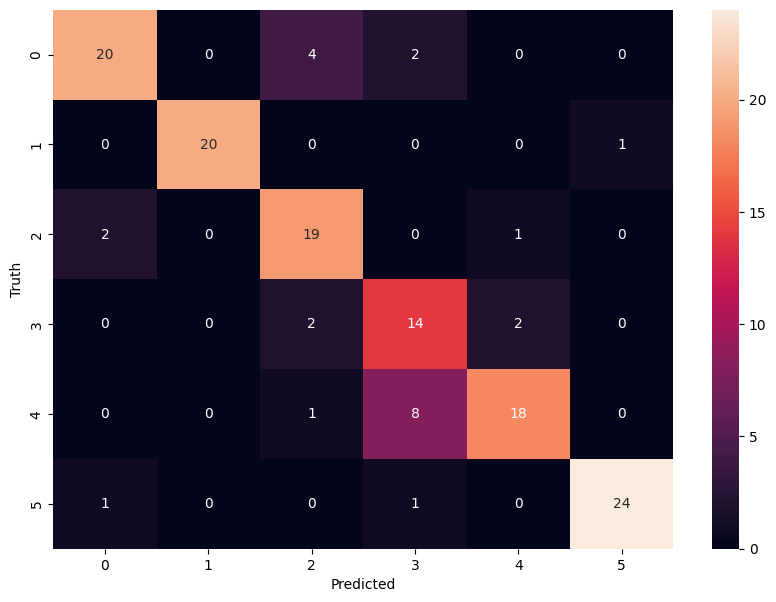

In [25]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = LR_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Save the model

In [26]:
# save the model
import joblib
joblib.dump(LR_model, '../models/LogisticRegression_model.pkl')

['../models/LogisticRegression_model.pkl']